# Training various models to determine the best one for the Airbnb data.

### Import necessary libraries and components.

In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score,confusion_matrix,roc_auc_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [269]:
path='C:/Zcommon/trainee/project_1/model_training_data.csv'
df=pd.read_csv(path)
df

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,...,amenity__Carbon_monoxide_alarm,amenity__Hot_water,amenity__Hangers,amenity__Cooking_basics,amenity__Dishes_and_silverware,amenity__Microwave,amenity__Bed_linens,amenity__Self_check-in,amenity__Iron,amenity__TV,amenity__Refrigerator,amenity__Essentials,amenity__Fire_extinguisher,amenity__Shampoo,amenity__First_aid_kit,amenity__Long_term_stays_allowed,amenity__Hair_dryer,amenity__Cleaning_products,amenity__Free_street_parking,amenity__Freezer,amenity__Dining_table,amenity__Exterior_security_cameras_on_property,amenity__Free_parking_on_premises,amenity__Coffee,amenity__Extra_pillows_and_blankets,amenity__Conditioner,amenity__Heating,amenity__Oven,amenity__Body_soap,amenity__Dedicated_workspace,amenity__Toaster,amenity__Dishwasher,amenity__Hot_water_kettle,amenity__Bathtub,amenity__Shower_gel,amenity__Air_conditioning,amenity__Stove,amenities_count,bathroom_private,encoded_host_response_time
0,100.0,50.0,0,1,5,1,1,42.657890,-73.753700,4,1.0,2.0,2.0,93.0,28,1125,28,28,1125,1125,28.0,1125.0,1,0,0,0,188,9,0,0,0,0,0,0.0,3.56,3.44,3.56,4.22,4.56,3.22,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,8,1,0
1,100.0,100.0,1,5,5,1,1,42.652220,-73.767240,3,1.0,2.0,1.0,91.0,2,1125,2,3,1125,1125,2.8,1125.0,1,30,49,79,354,311,6,0,76,15,36,3276.0,4.74,4.88,4.87,4.85,4.81,4.81,...,1,1,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,1,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,0,1,0,1,39,1,4
2,100.0,99.0,0,2,2,1,1,42.646150,-73.759660,2,1.0,0.0,2.0,64.0,2,45,1,2,1125,1125,1.3,1125.0,1,0,0,12,12,373,5,1,10,38,30,1920.0,4.52,4.62,4.45,4.81,4.88,4.76,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,1,1,0,1,0,1,1,1,40,1,4
3,100.0,100.0,1,5,5,1,1,42.652220,-73.767240,2,1.0,1.0,1.0,95.0,2,1125,1,3,1125,1125,2.7,1125.0,1,0,30,60,335,332,4,0,58,22,24,2280.0,4.73,4.83,4.71,4.83,4.70,4.80,...,1,0,1,1,1,1,1,1,1,0,1,1,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,0,1,0,1,37,1,4
4,100.0,100.0,1,1,1,1,1,42.655590,-73.765060,4,1.0,1.0,2.0,89.0,1,1125,1,1,1125,1125,1.0,1125.0,1,0,0,0,246,623,25,0,0,31,150,13350.0,4.79,4.86,4.82,4.95,4.93,4.87,...,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,33,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,100.0,99.0,0,9,9,1,1,42.680676,-73.783364,2,1.0,1.0,2.0,53.0,1,22,1,1,22,22,1.0,22.0,1,30,60,90,270,0,0,0,88,0,0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,12,1,3
421,100.0,99.0,0,9,9,1,1,42.681540,-73.784740,2,1.0,1.0,2.0,53.0,1,22,1,1,22,22,1.0,22.0,1,30,60,90,269,0,0,0,87,0,0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,12,1,3
422,80.0,11.0,0,10,11,1,1,42.655270,-73.785850,6,1.0,3.0,3.0,130.0,1,365,1,1,365,365,1.0,365.0,1,0,0,21,296,0,0,0,19,0,0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,9,1,4
423,100.0,100.0,0,22,28,1,1,42.681700,-73.784390,2,1.0,1.0,1.0,60.0,

## Assign the features and target to variables.

In [270]:
X=df.drop(columns=['price'])
y=np.log1p(df['price'])## steep variations in prices as seen in & during EDA.

In [271]:
df.describe()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,...,amenity__Carbon_monoxide_alarm,amenity__Hot_water,amenity__Hangers,amenity__Cooking_basics,amenity__Dishes_and_silverware,amenity__Microwave,amenity__Bed_linens,amenity__Self_check-in,amenity__Iron,amenity__TV,amenity__Refrigerator,amenity__Essentials,amenity__Fire_extinguisher,amenity__Shampoo,amenity__First_aid_kit,amenity__Long_term_stays_allowed,amenity__Hair_dryer,amenity__Cleaning_products,amenity__Free_street_parking,amenity__Freezer,amenity__Dining_table,amenity__Exterior_security_cameras_on_property,amenity__Free_parking_on_premises,amenity__Coffee,amenity__Extra_pillows_and_blankets,amenity__Conditioner,amenity__Heating,amenity__Oven,amenity__Body_soap,amenity__Dedicated_workspace,amenity__Toaster,amenity__Dishwasher,amenity__Hot_water_kettle,amenity__Bathtub,amenity__Shower_gel,amenity__Air_conditioning,amenity__Stove,amenities_count,bathroom_private,encoded_host_response_time
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,...,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,97.155294,88.225882,0.508235,27.597647,48.258824,0.971765,0.908235,42.659007,-73.776586,3.447059,1.231765,1.581176,1.837647,119.880000,5.585882,490.275294,5.305882,6.341176,634.567059,647.863529,5.913412,647.121412,0.976471,16.329412,38.872941,62.868235,249.484706,62.755294,15.141176,1.134118,60.962353,13.724706,85.745882,9753.905882,4.127224,4.161859,4.139059,4.229600,4.243412,4.038800,...,0.884706,0.837647,0.774118,0.767059,0.764706,0.748235,0.734118,0.717647,0.712941,0.710588,0.708235,0.644706,0.637647,0.632941,0.625882,0.600000,0.583529,0.555294,0.552941,0.541176,0.538824,0.536471,0.512941,0.505882,0.487059,0.482353,0.470588,0.458824,0.456471,0.451765,0.437647,0.423529,0.423529,0.416471,0.407059,0.381176,0.381176,37.971765,0.840000,3.557647
std,11.477187,21.859560,0.514463,140.144200,293.291372,0.165840,0.289034,0.010442,0.018606,2.438420,0.635842,1.098294,1.315544,119.955032,12.160204,396.924351,11.954339,14.744165,436.323470,436.180350,12.793750,435.442365,0.215905,10.907835,20.261914,28.051276,114.208950,114.145767,20.554548,1.865372,27.561227,21.928743,85.310429,12366.630670,1.629706,1.638621,1.628759,1.648305,1.652151,1.604691,...,0.319753,0.369209,0.418655,0.423203,0.424682,0.434538,0.442323,0.450675,0.452922,0.454024,0.455110,0.479166,0.481247,0.482571,0.484465,0.490475,0.493554,0.497519,0.497775,0.498889,0.499078,0.499256,0.500422,0.500555,0.500422,0.500277,0.499722,0.498889,0.498689,0.498254,0.496682,0.494700

# Split

In [272]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#  XGB Regression

In [273]:
model=XGBRegressor(n_estimators=600,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=2,
    reg_alpha=1)

In [274]:
model.fit(X_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


# Predict

In [275]:
y_pred=model.predict(X_test)

## Evaluation

In [276]:
mae_xgb = mean_absolute_error(y_test, y_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae_xgb)
print("RMSE:", rmse_xgb)

MAE: 0.18005708731108097
RMSE: 0.3262393195863297


## The values above are from log-prediction, since the outliers in target 'price' were messing with the whole outcome np.log1p() was used on 'price'

In [277]:
# convert both predictions and true values back to actual price
predsxgb = np.expm1(y_pred)          # model output → real price
true_y = np.expm1(y_test)         # original y → real price

# compute real-space metrics
mae_real = mean_absolute_error(true_y, predsxgb)
rmse_real = np.sqrt(mean_squared_error(true_y, predsxgb))

print(f"Real-Dollar MAE ($): {mae_real:.2f}")
print(f"Real-Dollar RMSE ($): {rmse_real:.2f}")


Real-Dollar MAE ($): 30.92
Real-Dollar RMSE ($): 111.96


In [278]:
true_prices = np.expm1(y_test)

comparison = pd.DataFrame({
    "Actual_Price": true_prices,
    "Predicted_Price": predsxgb
})
comparison.head(20)

,Actual_Price,Predicted_Price
417,93.0,97.991371
75,119.0,104.256798
176,92.0,112.587936
30,72.0,60.192032
357,92.0,81.481361
347,43.0,59.056705
154,72.0,66.671196
153,82.0,75.290688
414,151.0,111.531128
157,77.0,91.409813


# @ RandomForestRegression

In [279]:
rfrg=RandomForestRegressor(n_estimators=600,max_depth=6,random_state=42)
rfrg.fit(X_train,y_train)


,n_estimators,600
,criterion,'squared_error'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Prediction

In [280]:
y_pred_rg=rfrg.predict(X_test)

## Evaluation

In [281]:
mae_rf = mean_absolute_error(y_test, y_pred_rg)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rg))

print("MAE:", mae_rf)
print("RMSE:", rmse_rf)

MAE: 0.21769518196131507
RMSE: 0.37140647881163436


In [282]:
# convert both predictions and true values back to actual price
predsrf = np.expm1(y_pred_rg)       # model output → real price
true_y = np.expm1(y_test)         # original y → real price

# compute real-space metrics
mae_real = mean_absolute_error(true_y, predsrf)
rmse_real = np.sqrt(mean_squared_error(true_y, predsrf))

print(f"Real-Dollar MAE ($): {mae_real:.2f}")
print(f"Real-Dollar RMSE ($): {rmse_real:.2f}")


Real-Dollar MAE ($): 35.82
Real-Dollar RMSE ($): 119.97


In [283]:
true_prices = np.expm1(y_test)

comparison = pd.DataFrame({
    "Actual_Price": true_prices,
    "Predicted_Price": predsrf
})
comparison.head(20)

,Actual_Price,Predicted_Price
417,93.0,93.193151
75,119.0,88.701886
176,92.0,119.353532
30,72.0,62.456283
357,92.0,81.707523
347,43.0,60.852591
154,72.0,69.528776
153,82.0,63.621835
414,151.0,95.617287
157,77.0,93.776046


# @CatBoostRegression

In [284]:
cat=CatBoostRegressor()
cat.fit(X_train,y_train)

Learning rate set to 0.034527
0:	learn: 0.5397155	total: 2.5ms	remaining: 2.5s
1:	learn: 0.5308045	total: 5.8ms	remaining: 2.89s
2:	learn: 0.5221866	total: 8.72ms	remaining: 2.9s
3:	learn: 0.5143135	total: 11.1ms	remaining: 2.77s
4:	learn: 0.5067335	total: 13.7ms	remaining: 2.73s
5:	learn: 0.5000082	total: 16.2ms	remaining: 2.68s
6:	learn: 0.4932827	total: 19.6ms	remaining: 2.77s
7:	learn: 0.4865015	total: 22.6ms	remaining: 2.81s
8:	learn: 0.4791281	total: 25.6ms	remaining: 2.82s
9:	learn: 0.4720451	total: 28.2ms	remaining: 2.8s
10:	learn: 0.4659272	total: 30.7ms	remaining: 2.76s
11:	learn: 0.4598819	total: 33.3ms	remaining: 2.74s
12:	learn: 0.4528605	total: 36.4ms	remaining: 2.76s
13:	learn: 0.4464193	total: 39.5ms	remaining: 2.78s
14:	learn: 0.4412099	total: 42.7ms	remaining: 2.8s
15:	learn: 0.4352361	total: 45.3ms	remaining: 2.79s
16:	learn: 0.4284046	total: 48ms	remaining: 2.77s
17:	learn: 0.4229858	total: 51.2ms	remaining: 2.79s
18:	learn: 0.4182149	total: 54ms	remaining: 2.79s
19

## Prediction

In [285]:
ycat=cat.predict(X_test)

## Evaluation

In [286]:
mae_cat = mean_absolute_error(y_test, ycat)
rmse_cat = np.sqrt(mean_squared_error(y_test, ycat))

print("MAE:", mae_cat)
print("RMSE:", rmse_cat)

MAE: 0.18139066021234312
RMSE: 0.3455632833756724


In [287]:
# convert both predictions and true values back to actual price
predscat = np.expm1(ycat)          # model output → real price
true_y = np.expm1(y_test)         # original y → real price

# compute real-space metrics
mae_real = mean_absolute_error(true_y, predscat)
rmse_real = np.sqrt(mean_squared_error(true_y, predscat))

print(f"Real-Dollar MAE ($): {mae_real:.2f}")
print(f"Real-Dollar RMSE ($): {rmse_real:.2f}")

Real-Dollar MAE ($): 31.34
Real-Dollar RMSE ($): 113.01


In [288]:
true_prices = np.expm1(y_test)

comparison = pd.DataFrame({
    "Actual_Price": true_prices,
    "Predicted_Price": predscat
})
comparison.head(20)

,Actual_Price,Predicted_Price
417,93.0,93.812207
75,119.0,106.866727
176,92.0,98.007471
30,72.0,65.470365
357,92.0,73.181618
347,43.0,61.890973
154,72.0,79.639182
153,82.0,88.015418
414,151.0,106.503995
157,77.0,78.094419


# @LGBMRegression

In [289]:
lbg=LGBMRegressor(num_leaves = 64,
learning_rate = 0.05,
n_estimators = 800,
max_depth = -1,
min_data_in_leaf = 20,
feature_fraction = 0.8,
bagging_fraction = 0.8,
bagging_freq = 5,
lambda_l2 = 2,
lambda_l1 = 1)
lbg.fit(X_train,y_train)

,boosting_type,'gbdt'
,num_leaves,64
,max_depth,-1
,learning_rate,0.05
,n_estimators,800
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


## Prediction

In [290]:
y_lgb=lbg.predict(X_test)

## Evaluation

In [291]:
mae_lgb = mean_absolute_error(y_test, y_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_lgb))

print("MAE:", mae_lgb)
print("RMSE:", rmse_lgb)

MAE: 0.1796597352505053
RMSE: 0.3175372109472066


In [292]:
# convert both predictions and true values back to actual price
predslgbm = np.expm1(y_lgb)         # model output → real price
true_y = np.expm1(y_test)       # original y → real price

# compute real-space metrics
mae_real = mean_absolute_error(true_y, predslgbm)
rmse_real = np.sqrt(mean_squared_error(true_y, predslgbm))

print(f"Real-Dollar MAE ($): {mae_real:.2f}")
print(f"Real-Dollar RMSE ($): {rmse_real:.2f}")

Real-Dollar MAE ($): 29.81
Real-Dollar RMSE ($): 105.84


In [293]:
true_prices = np.expm1(y_test)

comparison = pd.DataFrame({
    "Actual_Price": true_prices,
    "Predicted_Price": predslgbm
})
comparison.head(20)

,Actual_Price,Predicted_Price
417,93.0,98.967356
75,119.0,115.508157
176,92.0,102.589686
30,72.0,58.574344
357,92.0,74.361274
347,43.0,67.400854
154,72.0,74.235769
153,82.0,75.552238
414,151.0,112.673377
157,77.0,77.219229


# Taking the best scores of all models(by best means with or without internal tuning regression parameters, whichever brings more favourable results).


📊 MODEL PERFORMANCE RANKING:
          Model       MAE      RMSE  Rank
0      LightGBM  0.179660  0.317537   1.0
1       XGBoost  0.180057  0.326239   2.0
2      CatBoost  0.181391  0.345563   3.0
3  RandomForest  0.217695  0.371406   4.0


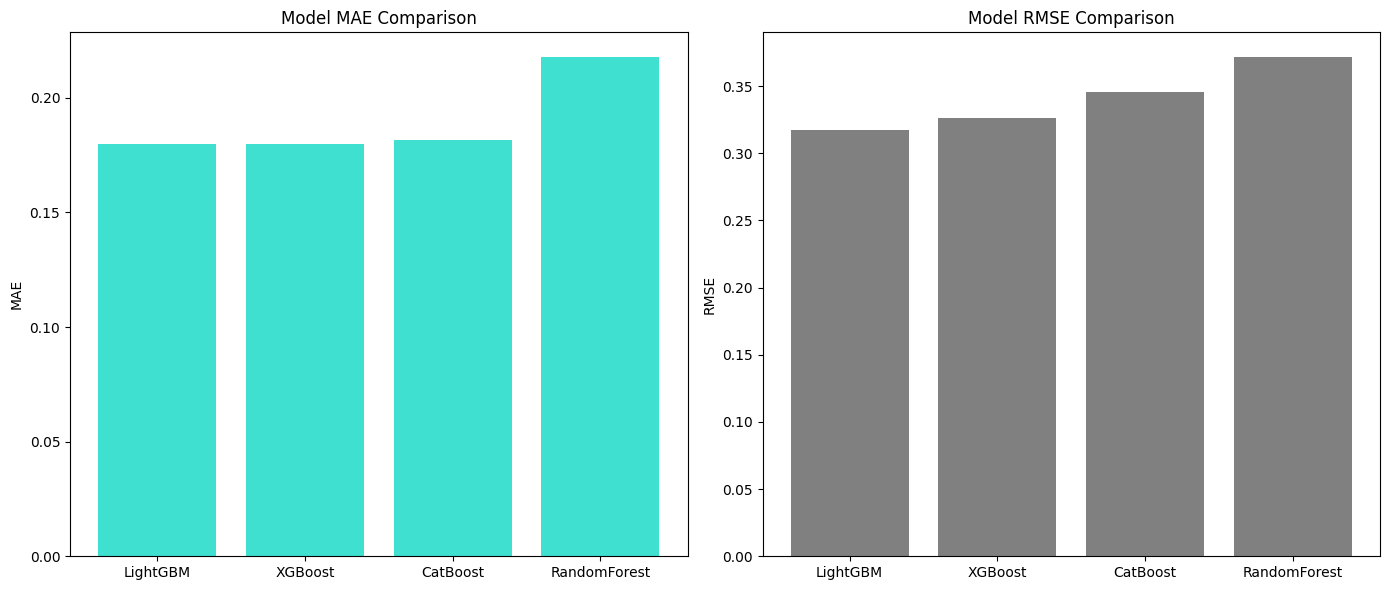

In [294]:
mae_scores = {
    "XGBoost": mae_xgb,
    "RandomForest": mae_rf,
    "LightGBM": mae_lgb,
    "CatBoost": mae_cat
}
rmse_scores = {
    "XGBoost": rmse_xgb,
    "RandomForest": rmse_rf,
    "LightGBM": rmse_lgb,
    "CatBoost": rmse_cat
}
# BUILD PERFORMANCE TABLE
ranking_df = pd.DataFrame({
    "Model": list(mae_scores.keys()),
    "MAE": list(mae_scores.values()),
    "RMSE": list(rmse_scores.values())
})

# COMBINED RANK (true 1,2,3,4 ranking)
ranking_df["Rank"] = ranking_df[["MAE", "RMSE"]].mean(axis=1).rank(method="dense")

# Sort by rank
ranking_df = ranking_df.sort_values("Rank").reset_index(drop=True)

print("\n📊 MODEL PERFORMANCE RANKING:")
print(ranking_df)

# PLOTTING
plt.figure(figsize=(14,6))

# MAE plot
plt.subplot(1,2,1)
plt.bar(ranking_df["Model"], ranking_df["MAE"], color='turquoise')
plt.title("Model MAE Comparison")
plt.ylabel("MAE")

# RMSE plot
plt.subplot(1,2,2)
plt.bar(ranking_df["Model"], ranking_df["RMSE"], color='gray')
plt.title("Model RMSE Comparison")
plt.ylabel("RMSE")

plt.tight_layout()
plt.show()


# From this we infer that LGBM beats the rest of the models in performance, though all of them have acceptable scores and may be used for predicting price.